# Imputar valores Missing

---

Se debe descargar una base de datos de la pagina de ics.uci.edu y aplicar tecnicas para tratar con los espacios vacios

> Estimation of obesity levels based on eating habits and physical condition

> This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. 

https://archive-beta.ics.uci.edu/ml/datasets/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition


**Variables:**

* Gender {Female,Male}
* Age numeric
* Height numeric
* Weight numeric
* family_history_with_overweight {yes,no}
* FAVC {yes,no}
* FCVC numeric
* NCP numeric
* CAEC {no,Sometimes,Frequently,Always}
* SMOKE {yes,no}
* CH2O numeric
* SCC {yes,no}
* FAF numeric
* TUE numeric
* CALC {no,Sometimes,Frequently,Always}
* MTRANS {Automobile,Motorbike,Bike,Public_Transportation,Walking}
* NObeyesdad {Insufficient_Weight,Normal_Weight,Overweight_Level_I,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III}

## Load Data

In [54]:
import pandas as pd
data = pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv',sep=',')

## Explore data

In [55]:
print("data.shape=", data.shape)
pd.concat([data.head(),data.tail()])

data.shape= (2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [56]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,2111,2,Male,1068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,2111.0,NaN,NaN,NaN,24.3126,6.345968,14.0,19.947192,22.77789,26.0,61.0
Height,2111.0,NaN,NaN,NaN,1.701677,0.093305,1.45,1.63,1.700499,1.768464,1.98
Weight,2111.0,NaN,NaN,NaN,86.586058,26.191172,39.0,65.473343,83.0,107.430682,173.0
family_history_with_overweight,2111,2,yes,1726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAVC,2111,2,yes,1866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FCVC,2111.0,NaN,NaN,NaN,2.419043,0.533927,1.0,2.0,2.385502,3.0,3.0
NCP,2111.0,NaN,NaN,NaN,2.685628,0.778039,1.0,2.658738,3.0,3.0,4.0
CAEC,2111,4,Sometimes,1765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMOKE,2111,2,no,2067,NaN,NaN,NaN,NaN,NaN,NaN,NaN


{'Male': 0.5059213642823307, 'Female': 0.49407863571766936}


<AxesSubplot:title={'center':'Grnder distribution'}>

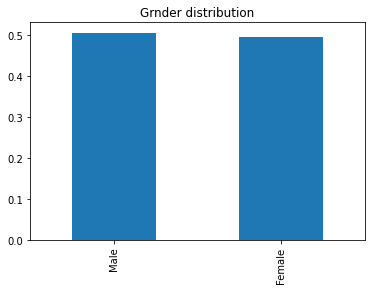

In [57]:
print(dict(data['Gender'].value_counts(normalize=True)))
data['Gender'].value_counts(normalize=True).plot.bar(title="Grnder distribution")

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

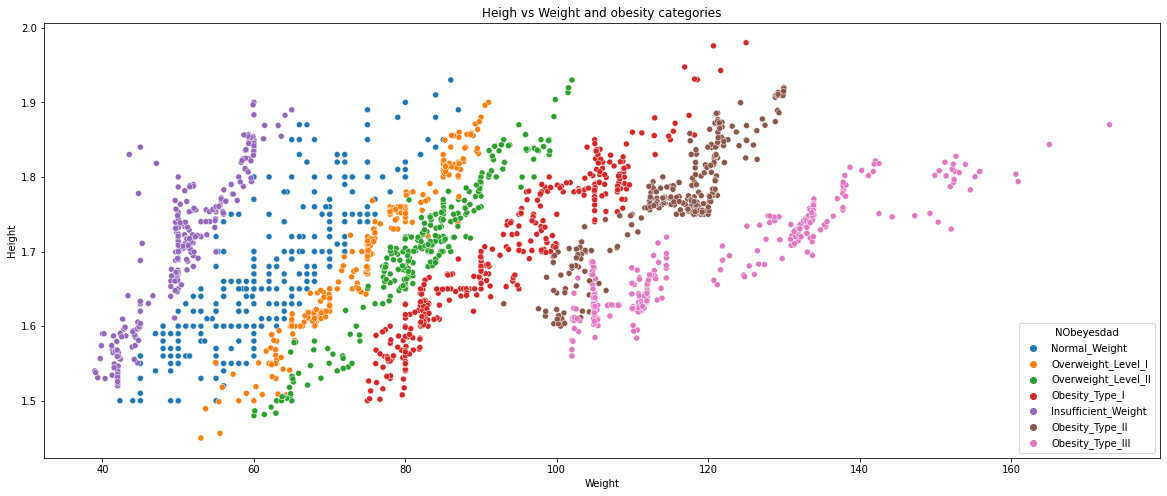

In [59]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=data, x="Weight", y="Height", hue="NObeyesdad");
plt.title("Heigh vs Weight and obesity categories")
plt.show()

## Is there missing values?

In [60]:
print("Missing by columns:")
data.isnull().sum()

Missing by columns:


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [61]:
print("Rows with missing values:")
len(data[data.isnull().sum(axis=1)>0])
len(data[data.isna().any(axis=1)])

Rows with missing values:


0

# Add missings

Only if data dosen't have missing values

In [62]:
data_missing = data.copy()

In [63]:
import numpy as np
np.random.seed(1234)

In [64]:
## add missing values
length = len(data_missing)
num = int(np.random.randint(5,15)/100*length)   ## % de missings
for i in data_missing.columns[:-3]:
    idx_replace = np.random.randint(0, length-1, num)
    data_missing.loc[idx_replace, i] = np.nan

In [65]:
# show data
pd.concat([data_missing.head(),data_missing.tail()])

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,NaN,NaN,1.800000,87.000000,no,no,3.0,3.0,NaN,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,NaN,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
2106,Female,20.976842,1.710730,131.408528,yes,yes,NaN,3.0,Sometimes,NaN,1.728139,no,1.676269,NaN,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,NaN,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,NaN,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [66]:

n = len(data)
rows_missing = len(data_missing[data_missing.isna().any(axis=1)])
print(f"Filas missing: {rows_missing}({round(rows_missing/n*100,2)}%)")
print("\nColumns with missing values:")
pd.concat([data_missing.isnull().sum(), data_missing.isnull().sum()/len(data)],axis=1).rename(columns={0:"Nulls",1:"%Nuls"})

Filas missing: 1425(67.5%)

Columns with missing values:


,Nulls,%Nuls
Gender,160,0.075793
Age,160,0.075793
Height,162,0.076741
Weight,162,0.076741
family_history_with_overweight,164,0.077688
FAVC,161,0.076267
FCVC,163,0.077215
NCP,164,0.077688
CAEC,162,0.076741
SMOKE,160,0.075793


In [67]:
print("Number of rows with empy columns:")
data_missing.isnull().sum(axis=1).value_counts().sort_index().reset_index().rename(columns={"index":"# columns with NaN",0:"Number of rows"})

Number of rows with empy columns:


,# columns with NaN,Number of rows
0,0,686
1,1,799
2,2,445
3,3,153
4,4,25
5,5,3


# Filling missings

In [68]:
# data copy
data2 = data_missing.copy()
data3 = data_missing.copy()
data4 = data_missing.copy()
data5 = data_missing.copy()
data6 = data_missing.copy()

In [69]:
# functions for filling nulls
import random

def impute_nan_meanmedian(df, variable, value):
    if value=="median":
        val=df[variable].median()
    if value=="mean":
        val=df[variable].mean()
    df[variable+"_"+value]=df[variable].fillna(val)
    return df

def rand_float_range(start, end):
    return random.random() * (end - start) + start

def impute_nan_random(df, variable, value=-9):
    if value!=-9:
        df[variable+"_random_fixed"]=df[variable].fillna(value)
    else:
        start,end=df[variable].min(),df[variable].max()
        df[variable+"_random"]=df[variable].fillna(rand_float_range(start,end))
    return df


In [70]:
data2 = impute_nan_meanmedian(data2, 'Age', 'mean')
data3 = impute_nan_meanmedian(data3, 'Age', 'median')
data4 = impute_nan_random(data4, 'Age')
data5 = impute_nan_random(data5, 'Age', 15)

In [71]:
## para aplicar KNN a variables categoricas se deben sacar las dummies
for c in data6.dtypes[data6.dtypes=="object"].index:
    temp = pd.get_dummies(data[c],prefix=c, prefix_sep="__")
    data6 = pd.concat([data6.drop(c,axis=1), temp],axis=1)
cols_for_data6 = list(data6.columns)

In [72]:
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# fit on the dataset
imputer.fit(data6)
# transform the dataset
data6 = imputer.transform(data6)

data6 = pd.DataFrame(data6, columns=cols_for_data6)

data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [73]:
res = pd.concat([
        data['Age'].round(0).astype(int).value_counts().sort_index()
        , data_missing['Age'].round(0).value_counts().sort_index()
        , data2['Age_mean'].astype(int).value_counts().sort_index()
        , data3['Age_median'].astype(int).value_counts().sort_index()
        , data4['Age_random'].astype(int).value_counts().sort_index()
        , data5['Age_random_fixed'].astype(int).value_counts().sort_index()
        , data6['Age'].astype(int).value_counts().sort_index()
    ]
    ,axis=1
)
res.columns = ['Age','missing','mean','median','random','random_fixed','knn']
res.index = res.index.astype(int)
print("Metrics calc for each Age:")
res

Metrics calc for each Age:


,Age,missing,mean,median,random,random_fixed,knn
14,1,1,1.0,1.0,161.0,1.0,1.0
15,1,1,1.0,1.0,1.0,161.0,1.0
16,20,20,28.0,28.0,28.0,28.0,29.0
17,69,63,76.0,76.0,76.0,76.0,81.0
18,212,204,231.0,231.0,231.0,231.0,240.0
19,169,162,172.0,172.0,172.0,172.0,176.0
20,150,136,126.0,126.0,126.0,126.0,142.0
21,236,222,253.0,253.0,253.0,253.0,273.0
22,163,149,144.0,304.0,144.0,144.0,171.0
23,218,195,150.0,150.0,150.0,150.0,159.0


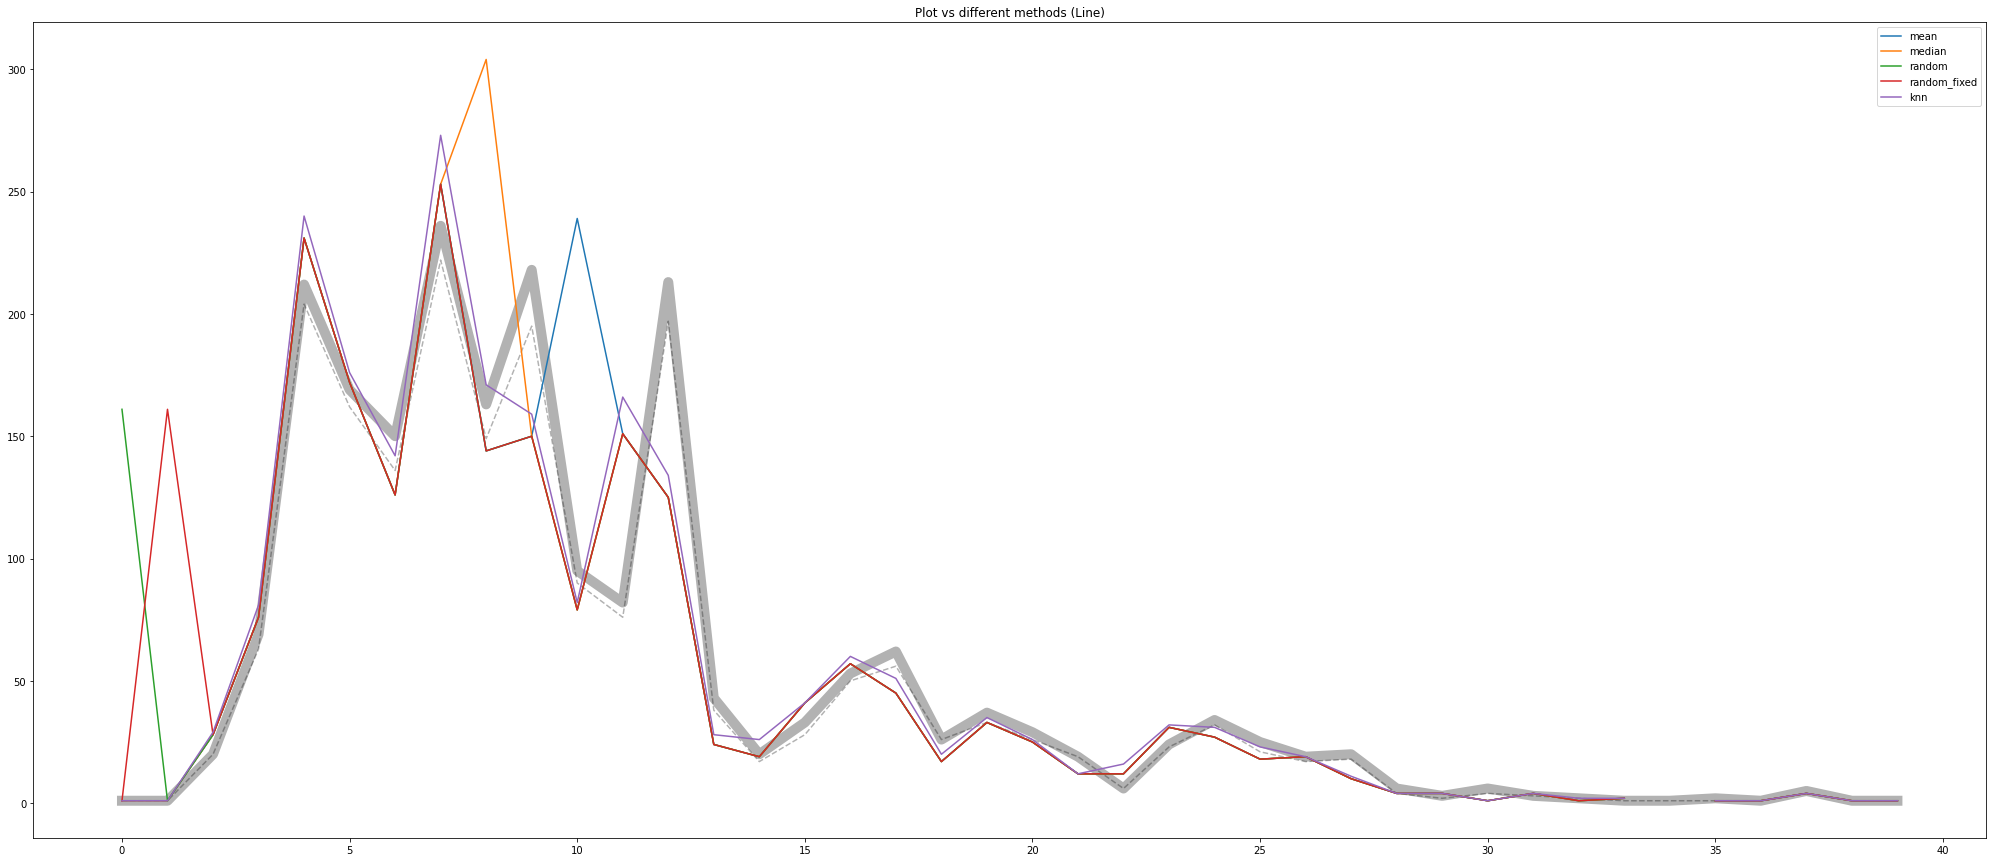

In [74]:
plt.figure(figsize=(35,15))
ax = res["Age"].plot(kind="line", use_index=False, linewidth=10, color="black", alpha=0.3)
ax = res["missing"].plot(kind="line", use_index=False, linestyle='--', color="black", alpha=0.3)
ax = res.drop(["Age","missing"],axis=1).plot(kind="line", use_index=False, ax=ax)
# ax = res.drop(["Age","missing"],axis=1).plot(kind="bar", use_index=True, ax=ax)
plt.title("Plot vs different methods (Line)")
plt.show()

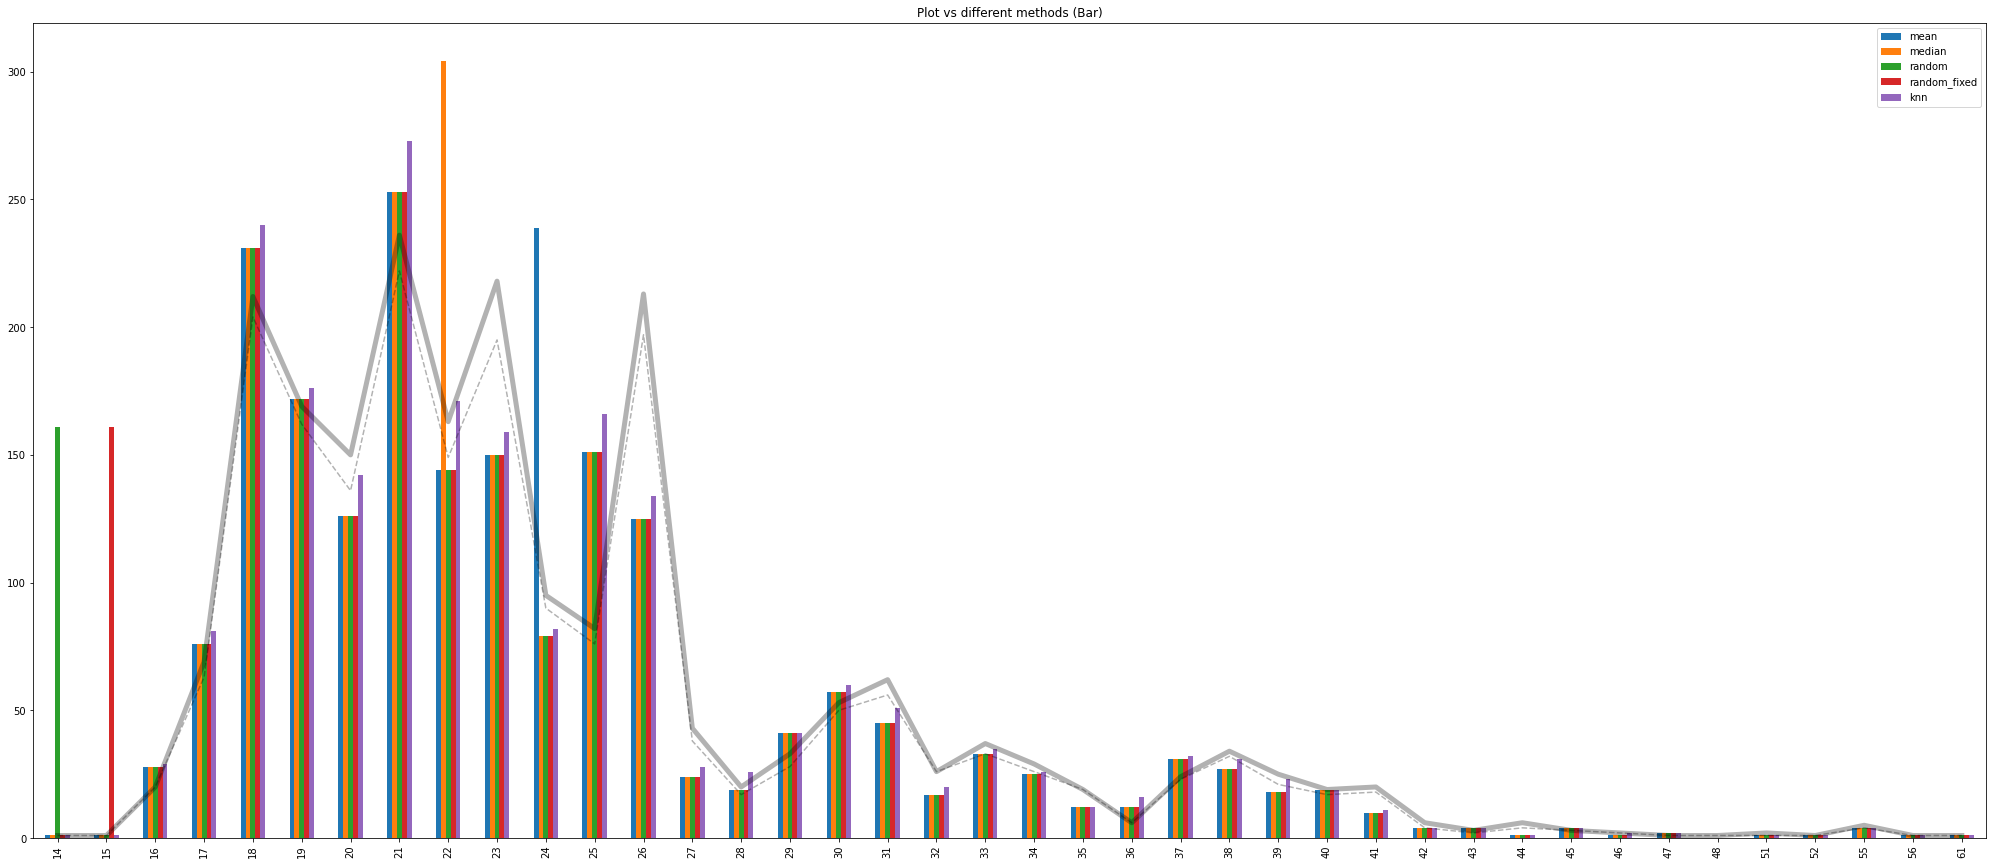

In [75]:
plt.figure(figsize=(35,15))
ax = res["Age"].plot(kind="line", use_index=False, linewidth=5, color="black", alpha=0.3)
ax = res["missing"].plot(kind="line", use_index=False, linestyle='--', color="black", alpha=0.3)
ax = res.drop(["Age","missing"],axis=1).plot(kind="bar", use_index=True, ax=ax)
plt.title("Plot vs different methods (Bar)")
plt.show()

<AxesSubplot:>

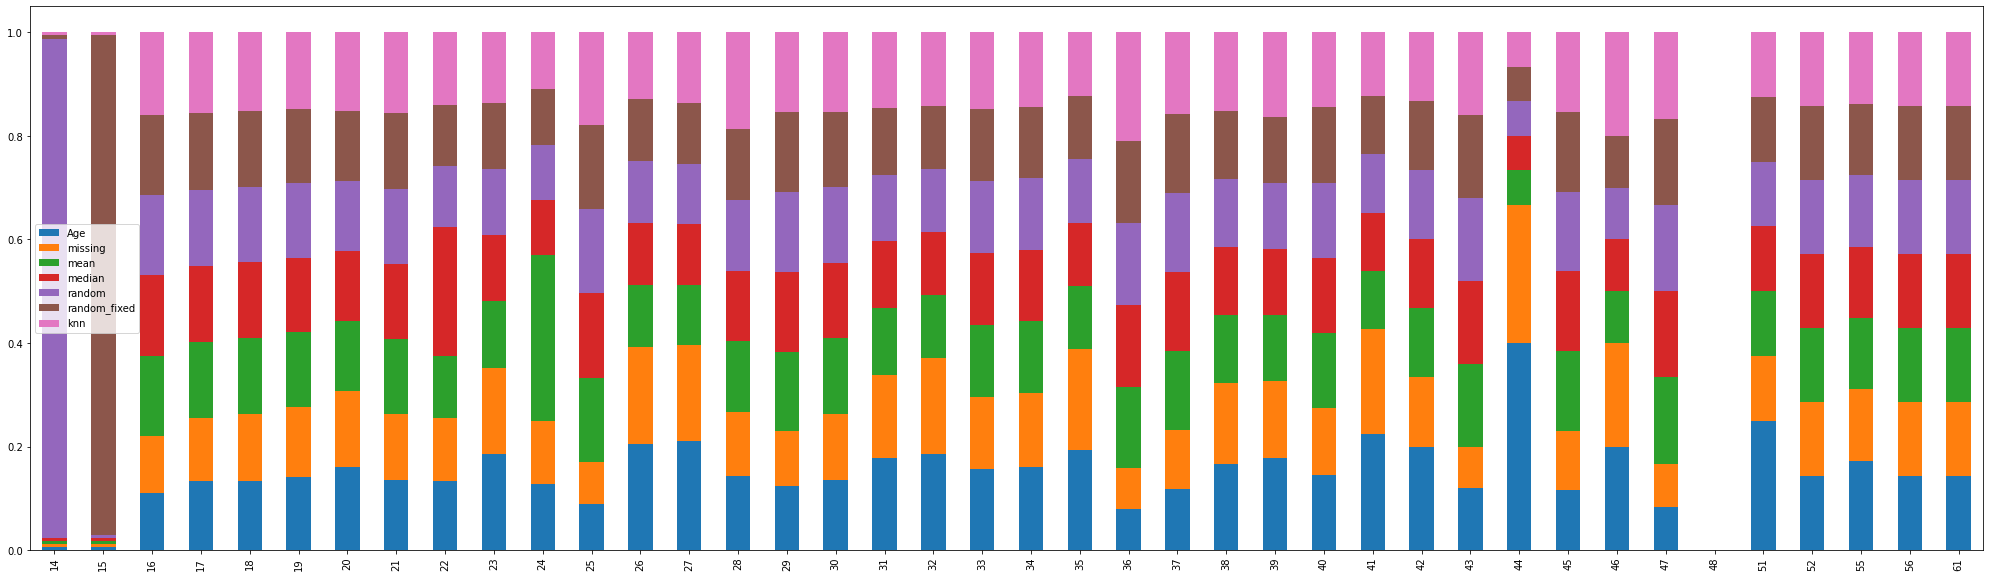

In [76]:
res.apply(lambda x: x/sum(x),axis=1).plot.bar(stacked=True, figsize=(35,10))

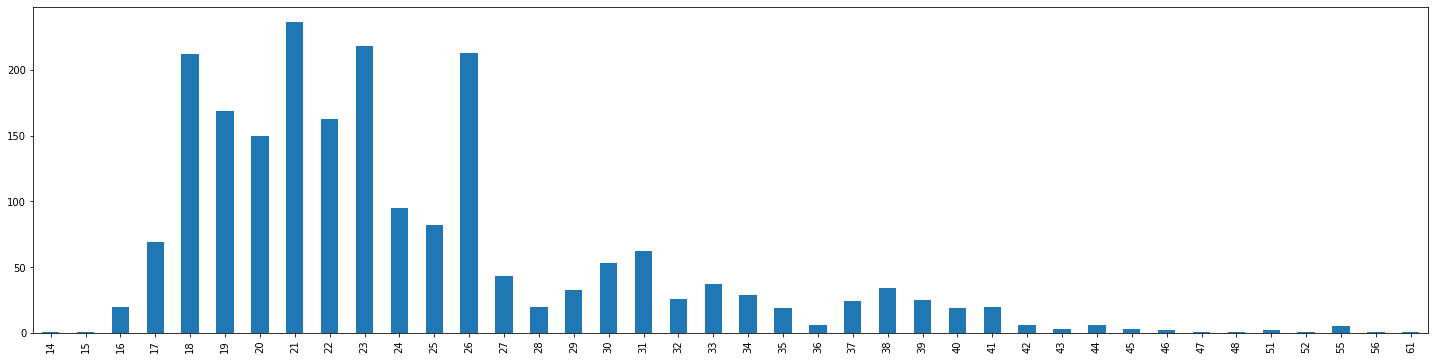

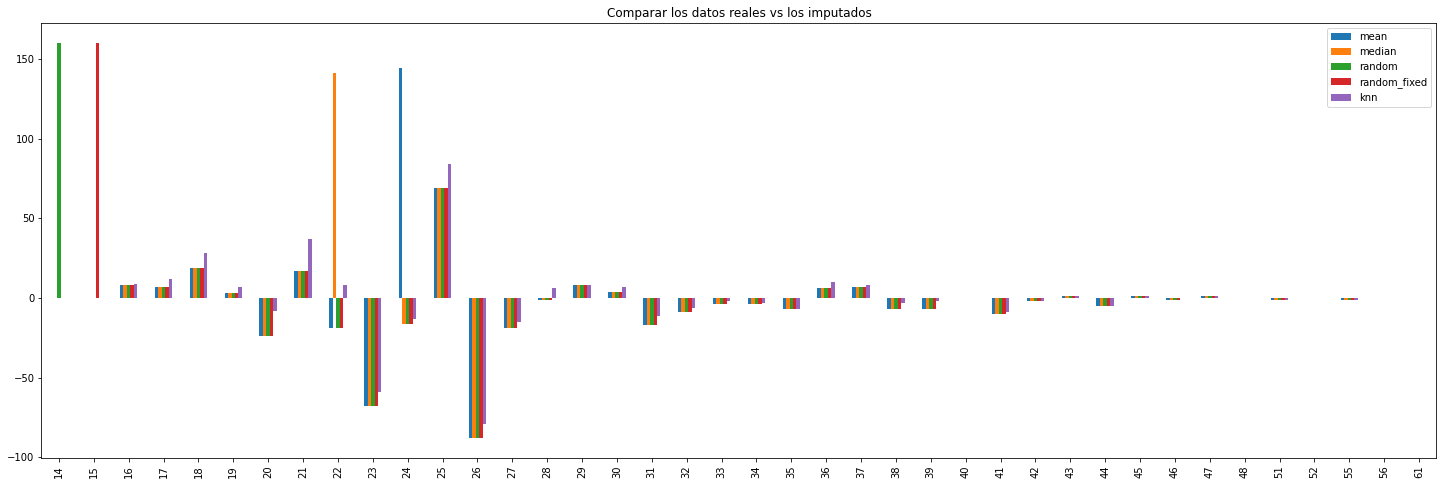

In [77]:
res['Age'].plot(figsize=(25,6), kind="bar")
res.apply(lambda x: x.iloc[2:]-x['Age'],axis=1).plot(figsize=(25,8), kind="bar", title="Comparar los datos reales vs los imputados")
plt.show()

# Resultado
El que mas se ajusta es el de KNN con respecto al missing